In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from numpy.fft import fft, fftshift, ifft, ifftshift
np.random.seed(10)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
from source import source
from parameters import default_parameters, test_parameters
from tqdm import tqdm

In [3]:
import import_ipynb
from utils import fast_fourier_transform, inverse_fast_fourier_transform
from mod import MQAM_constellation, symbols_to_signal_mapping
from Channel import Channel

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from mod.ipynb
importing Jupyter notebook from Channel.ipynb


Normalized complex constellation


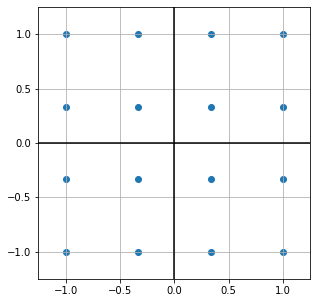

Complex constellation with power


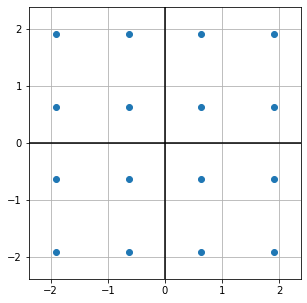

In [4]:
qam_16_cst = MQAM_constellation(16) 
_ = qam_16_cst.norm_complex_constellation
_ = qam_16_cst.get_constellation(6)
print('Normalized complex constellation')
qam_16_cst.plot_constellation(qam_16_cst.norm_complex_constellation)


const_p = 3.81

_ = qam_16_cst.norm_complex_constellation
_ = qam_16_cst.get_constellation(const_p)

print('Complex constellation with power')
qam_16_cst.plot_constellation(qam_16_cst.complex_constellation)

In [5]:
def power(s, M):
    return  np.mean(np.abs(list(s))**2)
    
s= qam_16_cst.complex_constellation.values()
p = power(s, len(s))
print(p)

def snr(noise, p):
    return 10*np.log(10*(p/noise))
sigma_pow_2 = default_parameters['sigma_0_pow_2']['value'] 
B = default_parameters['B']['value']
L = default_parameters['L']['value']

p_noise = sigma_pow_2 * B *L

print('snr:',snr(p_noise, p))

4.03225
snr: 226.44222268327098


13.653333333333334
norm_Pp 3.81


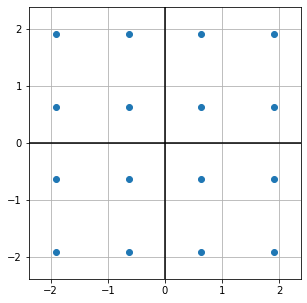

In [6]:
# Time mesh
T = 1150
T = 150
N = 2**11# + 2**7 #*1e9
dt = T/N # 1/dt > 2*B
t = np.arange(-T/2,T/2,dt)
assert(len(t) == N) # sanity check

# Frequency mesh
F = 1/dt
df = 1/T
f = np.arange(-F/2,F/2,df)
assert(len(f) == N) # sanity check
print(F)

M = 16
n = 1000
# n = 10
nb = n*int(np.log2(M))
p = 1/2
B = 10 #default_parameters['B']['value'] # 1e9
Pp = 6e-3
norm_Pp = Pp/default_parameters['P_0']['value'] # need to be dynamically
_, b = source(nb,p)

qam_16_cst = MQAM_constellation(M) 
_ = qam_16_cst.norm_complex_constellation
_ = qam_16_cst.get_constellation(norm_Pp)
symb_seq, complex_symb_seq = qam_16_cst.bit_to_symb(b)
print('norm_Pp', norm_Pp)
#print(symb_seq)
#print(complex_symb_seq)
qam_16_cst.plot_constellation(qam_16_cst.complex_constellation)

In [7]:
q_0, sincs = symbols_to_signal_mapping(t, complex_symb_seq ,B)

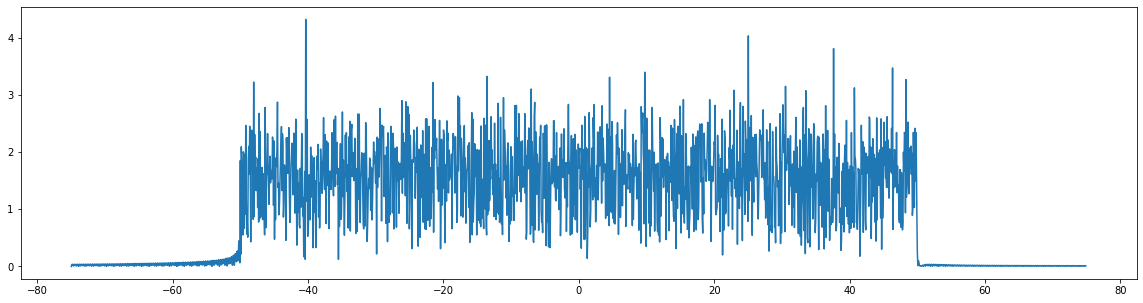

[ 3.58104973e-15+1.53553631e-15j -2.20506974e-02+1.93045654e-02j
  2.94602774e-02-2.58151775e-02j ... -5.30523619e-03+6.64933971e-03j
  9.08384765e-03-1.13592544e-02j -6.81345276e-03+8.50078457e-03j]
[0.04329522-0.04165713j 0.04329628-0.04165721j 0.04329857-0.04165846j ...
 0.04329938-0.04166398j 0.04329677-0.04166052j 0.04329538-0.04165824j]
(3, 2048) (3, 2048)
[[ 3.58104973e-15+1.53553631e-15j -2.20506974e-02+1.93045654e-02j
   2.94602774e-02-2.58151775e-02j ... -5.30523619e-03+6.64933971e-03j
   9.08384765e-03-1.13592544e-02j -6.81345276e-03+8.50078457e-03j]
 [ 3.58104973e-15+1.53553631e-15j -2.20506974e-02+1.93045654e-02j
   2.94602774e-02-2.58151775e-02j ... -5.30523619e-03+6.64933971e-03j
   9.08384765e-03-1.13592544e-02j -6.81345276e-03+8.50078457e-03j]
 [ 3.58104973e-15+1.53553631e-15j -2.20506974e-02+1.93045654e-02j
   2.94602774e-02-2.58151775e-02j ... -5.30523619e-03+6.64933971e-03j
   9.08384765e-03-1.13592544e-02j -6.81345276e-03+8.50078457e-03j]]
[[0.04329522-0.04165713j 

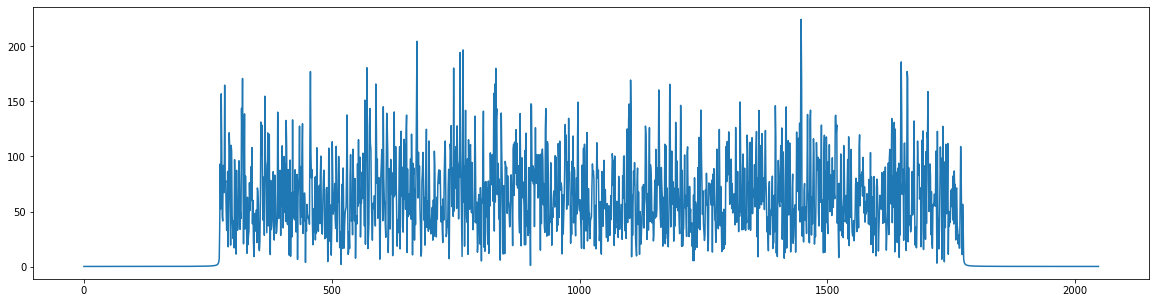

In [8]:
#plot each sinc for debugging
# for sinc in sincs:
#     plt.plot(t,(sinc),'--')
# plt.show()

#plot the x(t)
plt.plot(t,np.abs(q_0),'-') 
plt.show()

# A = 1
# s = .5
# q_0 = A*np.exp(-t**2/s)
# plt.plot(t,np.abs(q_0),'-') 
# plt.show()

q0f = fftshift(fft(q_0))
print(q_0)
print(q0f)
q_test = [q_0,q_0,q_0]
q_test = np.array(q_test)
q_test_f = fftshift(fft(q_test,axis=1))
print(q_test.shape ,q_test_f.shape)
print(q_test)
print(q_test_f)
plt.plot(np.abs(q0f))
plt.show()

In [9]:
z = default_parameters['L_0']['value']
z = 100
print('optical fiber length',z, '\bm')
nz = z*1000
print('nz',nz)
noise_sigma_pow_2 = default_parameters['sigma_0_pow_2']['value'] 
gamma = default_parameters['gamma']['value']
beta2 = default_parameters['beta_2']['value']

#noise_sigma_pow_2 = 0
print('noise_power',noise_sigma_pow_2)
q_z = Channel.generate(t, q_0, z, nz, gamma,beta2, noise_sigma_pow_2)
qzf = fftshift(fft(q_z))
qz0i = ifft(ifftshift(qzf))

optical fiber length 100 m
nz 100000
noise_power 5.905907932714276e-24


KeyboardInterrupt: 

In [ ]:
plt.plot(t,np.abs(q_0))
plt.plot(t,np.abs(q_z))
plt.plot(t,np.abs(qz0i))
plt.legend(['input signal', 'output signal'])
plt.title('signals in Time domaine')
plt.show()
plt.plot(f,np.abs(q0f))
plt.plot(f,np.abs(qzf))
plt.legend(['input signal', 'output signal'])
plt.title('signals in Freq domaine')
plt.show()

In [13]:
def generate_n_data(n, s):
    # Time mesh
    T = 1150
    T = 150
    N = 2**11# + 2**7 #*1e9
    dt = T/N # 1/dt > 2*B
    t = np.arange(-T/2,T/2,dt)
    assert(len(t) == N) # sanity check

    # Frequency mesh
    F = 1/dt
    df = 1/T
    f = np.arange(-F/2,F/2,df)
    assert(len(f) == N) # sanity check

    M = 16
    n = n
    # n = 10
    nb = n*int(np.log2(M))
    p = 1/2
    B = 10 #default_parameters['B']['value'] # 1e9
    Pp = 6e-3
    norm_Pp = Pp/default_parameters['P_0']['value'] # need to be dynamically
    

    qam_16_cst = MQAM_constellation(M) 
    _ = qam_16_cst.norm_complex_constellation
    _ = qam_16_cst.get_constellation(norm_Pp)
    data_0 = []
    data_bin = []
    for iindex in range(s):
        _, b = source(nb,p)
        data_bin.append(b)
        symb_seq, complex_symb_seq = qam_16_cst.bit_to_symb(b)
        q_0, sincs = symbols_to_signal_mapping(t, complex_symb_seq ,B)
        data_0.append(q_0)
    
#     plt.plot(t,np.abs(q_0),'-') 
#     plt.show()

    # A = 1
    # s = .5
    # q_0 = A*np.exp(-t**2/s)
    # plt.plot(t,np.abs(q_0),'-') 
    # plt.show()

    data_0_f = fftshift(fft(data_0, axis=1))
#     plt.plot(np.abs(q0f))
#     plt.show()
    
    z = 100
    #print('optical fiber length',z, '\bm')
    nz = z*1000
    #print('nz',nz)
    noise_sigma_pow_2 = default_parameters['sigma_0_pow_2']['value'] 
    gamma = default_parameters['gamma']['value']
    beta2 = default_parameters['beta_2']['value']

    #noise_sigma_pow_2 = 0
    #print('noise_power',noise_sigma_pow_2)
    q_z = Channel.generate(t, data_0, z, nz, gamma,beta2, noise_sigma_pow_2)
    qzf = fftshift(fft(q_z, axis=1))
    
#     plt.plot(t,np.abs(q_0))
#     plt.plot(t,np.abs(q_z))
#     plt.legend(['input signal', 'output signal'])
#     plt.title('signals in Time domaine')
#     plt.show()
#     plt.plot(f,np.abs(q0f))
#     plt.plot(f,np.abs(qzf))
#     plt.legend(['input signal', 'output signal'])
#     plt.title('signals in Freq domaine')
#     plt.show()
    return data_bin, data_0_f, q_z

generate_n_data(10,3)

(['1001011011011101000101110011010110010110',
  '0010110011110101100011001111010000101111',
  '1111101111010101001000100110001011100111'],
 array([[-0.0010321 +0.0020642j , -0.00103211+0.00206423j,
         -0.00103216+0.00206432j, ..., -0.00103223+0.00206446j,
         -0.00103216+0.00206432j, -0.00103211+0.00206423j],
        [ 0.00412848+0.00206431j,  0.00412854+0.00206434j,
          0.00412871+0.00206442j, ...,  0.00412901+0.00206457j,
          0.00412871+0.00206442j,  0.00412854+0.00206433j],
        [-0.00722477-0.00103219j, -0.00722488-0.00103221j,
         -0.00722518-0.00103225j, ..., -0.00722569-0.00103232j,
         -0.00722518-0.00103225j, -0.00722488-0.00103221j]]),
 array([[ 8.62400258e-08+8.60017173e-08j, -1.37765330e-03-6.89149614e-04j,
          1.83979133e-03+9.20427031e-04j, ...,
         -1.07352928e-03-5.36469115e-04j,  1.83549529e-03+9.17358208e-04j,
         -1.37443917e-03-6.86853636e-04j],
        [ 8.57801980e-08+8.57693512e-08j,  2.41219833e-03+3.44371287e-

In [14]:
data_size = 10**5
chunk_size= 10
total_file = int(np.ceil( data_size /chunk_size ))
nb_symbol = 1000
file_name_template = './data/micas913_chunk_{}_{}_{}.npy'
for file_index in tqdm(range(1, data_size+1, chunk_size)):
    input_f = open(file_name_template.format(file_index//chunk_size+1, total_file//data_size, 'input'),'ab')
    bin_f = open(file_name_template.format(file_index//chunk_size+1, total_file//data_size, 'bin'),'ab')
    output_f = open(file_name_template.format(file_index//chunk_size+1, total_file//data_size, 'output'),'ab')

    bin_d ,q_0, q_z = generate_n_data(nb_symbol, chunk_size)
    np.save(bin_f, bin_d )
    np.save(input_f, q_0)
    np.save(output_f, q_z)
    
    bin_f.close()
    input_f.close()
    output_f.close()
    

  0%|          | 1/10000 [02:38<440:17:54, 158.52s/it]


KeyboardInterrupt: 